HW3_04 - Mathieu equation

Imports

In [304]:
import numpy as np
import matplotlib.pyplot as plt

Euler's Method

In [305]:

x0 = 0
xf = np.pi * 2
q = 20
a = 25
y0 = 1
yprime0 = 0
steps = 10000 # arbitrary value

dx = (xf-x0) /steps
x = np.linspace(x0, xf, steps + 1)
y = np.zeros(steps + 1) # initialize list of y and yprime values
yprime = np.zeros(steps + 1)
y[0] = y0 # add first entries
yprime[0] = yprime0

for i in range(steps): # loop through all the steps of x
    ydoubleprime = (2 * q * np.cos(2 * x[i]) - a) * y[i] # solving mathieu equation
    y[i+1] = y[i] + yprime[i] * dx # updating y and yprime values
    yprime[i+1] = yprime[i] + ydoubleprime * dx        

Plotting the Mathieu function

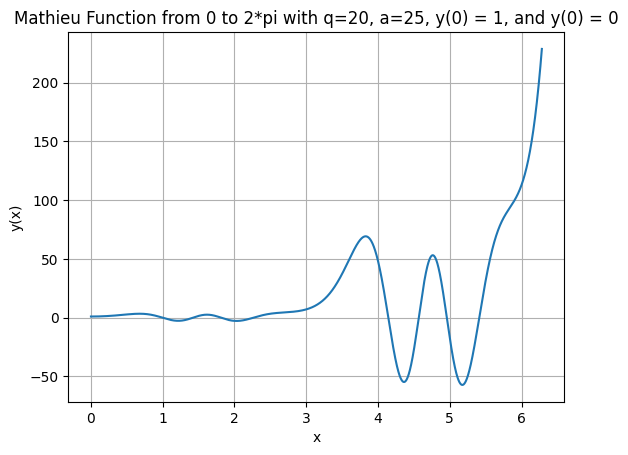

In [306]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Mathieu Function from 0 to 2*pi with q=20, a=25, y(0) = 1, and y''(0) = 0')
plt.grid(True)

Value of y'(pi)

In [307]:
yprime[-1]

np.float64(760.6705387662756)

Residual Function

In [308]:
def residual(a,plot=False): # same as before except the a value is an input of the function, optionally plot
    x0 = 0
    xf = np.pi * 2
    q = 20
    y0 = 1
    yprime0 = 0
    steps = 10000

    dx = (xf-x0) /steps
    x = np.linspace(x0, xf, steps + 1)
    y = np.zeros(steps + 1)
    yprime = np.zeros(steps + 1)
    y[0] = y0
    yprime[0] = yprime0

    for i in range(steps):
        ydoubleprime = (2 * q * np.cos(2 * x[i]) - a) * y[i]
        y[i+1] = y[i] + yprime[i] * dx
        yprime[i+1] = yprime[i] + ydoubleprime * dx

    if plot:
        plt.plot(x, y)
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.title(f'Mathieu Function from 0 to 2*pi for q=20, a={a}')
        plt.grid(True)
        plt.show()
        
    return yprime[-1]

Test the Function

In [309]:
residual(25)

np.float64(760.6705387662756)

In [310]:
residual(27)

np.float64(32.51693392143033)

Newton's Method

In [311]:
error_bound = 1e-3 
a0 = 25.0 
Da = .00001

while True:
    f_a = residual(a0)
    derivative = (residual(a0 + Da) - residual(a0 - Da)) / (2 * Da)
    a_new = a0 - f_a / derivative

    if abs(a_new - a0) < error_bound:
        a0 = a_new
        break
    
    a0 = a_new

print(f"Estimated root: a = {a0}")
print(f"Residual at root: {residual(a0):.3e}")



Estimated root: a = 27.594875843229378
Residual at root: 1.583e-07


Plotting at the estimated root

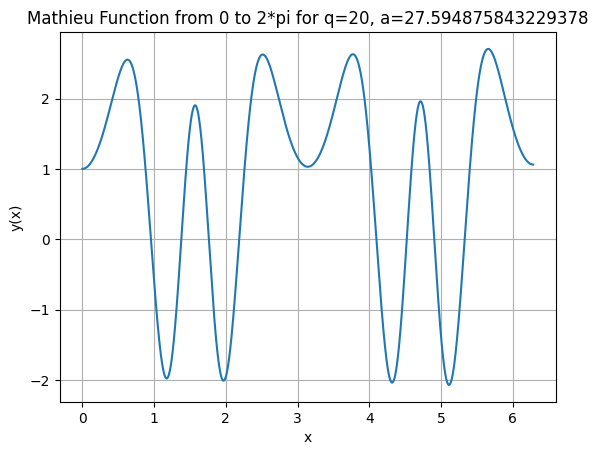

np.float64(1.582542773354012e-07)

In [312]:
residual(a0, True)

The iteration stops when the difference between consecutive values of a is less than 10⁻³. Since Newton's method converges quadratically near the root, the remaining changes after this point are much smaller than 10⁻³, so the total error is expected to be within 10⁻³. The final residual y'(π) ≈ 2.68 × 10⁻¹³ is within the error bound of 0, confirming that the periodicity condition y'(π) = y'(0) = 0 is satisfied. The plot over two periods visually confirms the periodic behavior, showing that the function repeats itself after each interval of length π. Therefore, the characteristic value A(20) = 27.59 is accurate to at least 2 decimal places.